#### Linear Regression Example
##### Single variabe linear regression
 

In [1]:
import matplotlib.pyplot as plt
import numpy as np


(50,)


(0.0, 50.0)

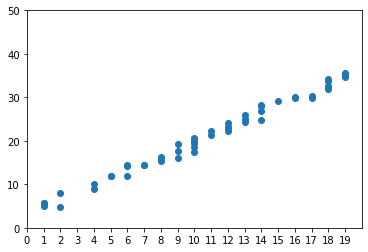

In [7]:
### y = b0 + b1 * x1
##  b0 intercepter, b1 slope
b1 = 1.7
b0 = 2.6

rng = np.random.RandomState(1)

### random 50 number from 1 to 20
x = rng.randint(1, 20, 50) 
print(x.shape)

##  create some noice by rng.rand(50)
y = b1 * x + rng.randn(50) + b0 

plt.scatter(x, y)
plt.xticks(range(20))
plt.xlim([0,20])
plt.ylim([0,50])


In [9]:
## training fit
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)

X = x[:, np.newaxis]

# step 1: training
model.fit(X, y) # X is 2d, y is 1d

print(f"intercept: {model.intercept_},  b0: { b0 }") 
print(f"coefficient: {model.coef_},  slop b1 : { b1 }") 

intercept: 3.1560218768366255,  b0: 2.6
coefficient: [1.66290078],  slop b1 : 1.7


(0.0, 80.0)

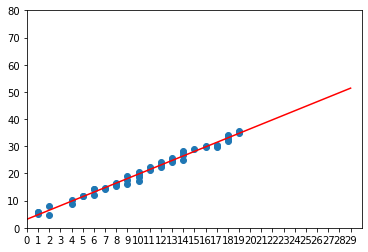

In [13]:
# step2: prediction
xfit = np.arange(30) # 1 to 10, array
Xfit = xfit[:, np.newaxis] # 2d 

yfit = model.predict(Xfit) # Xfit must be a 2d, yfit output is 1d

plt.scatter(x, y,)  # training points

plt.plot(xfit, yfit, color='red')

plt.xticks(range(30))
plt.xlim([0,30])
plt.ylim([0,80])